<a href="https://colab.research.google.com/github/seiji0203/Machine-Learning-Models/blob/master/optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('/content/drive/My Drive/DNN_code/lesson_2')

# optimizer

## SGD

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.15
                : 10. 正答率(テスト) = 0.0958
Generation: 20. 正答率(トレーニング) = 0.07
                : 20. 正答率(テスト) = 0.1009
Generation: 30. 正答率(トレーニング) = 0.08
                : 30. 正答率(テスト) = 0.1009
Generation: 40. 正答率(トレーニング) = 0.08
                : 40. 正答率(テスト) = 0.0958
Generation: 50. 正答率(トレーニング) = 0.11
                : 50. 正答率(テスト) = 0.1028
Generation: 60. 正答率(トレーニング) = 0.08
                : 60. 正答率(テスト) = 0.1028
Generation: 70. 正答率(トレーニング) = 0.13
                : 70. 正答率(テスト) = 0.0958
Generation: 80. 正答率(トレーニング) = 0.18
                : 80. 正答率(テスト) = 0.0958
Generation: 90. 正答率(トレーニング) = 0.07
                : 90. 正答率(テスト) = 0.0958
Generation: 100. 正

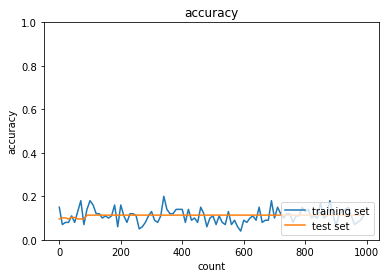

In [3]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## SGDの検討

```
SGD　bace model (正答率 0.1135)

検討1 (正答率 0.6577)
バッチ正規化　use_batchnorm = False -> use_batchnorm = True

検討2(正答率 0.9424)
use_batchnorm = True
activation='sigmoid' -> activation='relu'

検討3(正答率 0.9023)
use_batchnorm = True
activation='relu'
weight_init_std=0.01 -> weight_init_std='he'

検討4(正答率 0.9171)
use_batchnorm = True
activation='relu'
weight_init_std=0.01 -> weight_init_std='xavier'

検討5(正答率 0.9482)
use_batchnorm = True
activation='relu'
weight_init_std='xavier'
learning_rate = 0.01 -> learning_rate = 0.05

検討6(正答率 0.955)
use_batchnorm = True
activation='relu'
weight_init_std='xavier'
learning_rate = 0.01 -> learning_rate = 0.09
```

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.6
                : 10. 正答率(テスト) = 0.5107
Generation: 20. 正答率(トレーニング) = 0.76
                : 20. 正答率(テスト) = 0.6824
Generation: 30. 正答率(トレーニング) = 0.81
                : 30. 正答率(テスト) = 0.7564
Generation: 40. 正答率(トレーニング) = 0.86
                : 40. 正答率(テスト) = 0.8166
Generation: 50. 正答率(トレーニング) = 0.88
                : 50. 正答率(テスト) = 0.8365
Generation: 60. 正答率(トレーニング) = 0.89
                : 60. 正答率(テスト) = 0.8703
Generation: 70. 正答率(トレーニング) = 0.93
                : 70. 正答率(テスト) = 0.8723
Generation: 80. 正答率(トレーニング) = 0.88
                : 80. 正答率(テスト) = 0.8871
Generation: 90. 正答率(トレーニング) = 0.93
                : 90. 正答率(テスト) = 0.8919
Generation: 100. 正答率(トレーニング) = 0.92
                : 100. 正答率(テスト) = 0.899
Generation: 110. 正答率(トレーニング) = 0.91
                : 110. 正答率(テスト) = 0.9006
Generation: 120. 正答率(トレーニング) = 0.91
                : 120. 正答率(テスト) = 0.8979
Generation: 130. 正答率(トレーニング) = 0.95
                : 130. 正答率(テスト) = 0.9076
Generatio

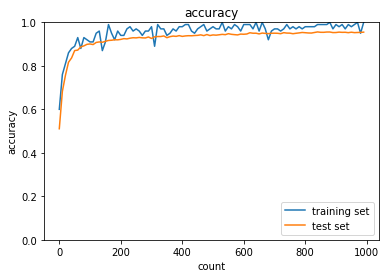

In [18]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = True
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='xavier',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.09

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Momentum

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.08
                : 10. 正答率(テスト) = 0.0958
Generation: 20. 正答率(トレーニング) = 0.1
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.09
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.17
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.12
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.11
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.12
                : 80. 正答率(テスト) = 0.0974
Generation: 90. 正答率(トレーニング) = 0.11
                : 90. 正答率(テスト) = 0.0974
Generation: 100. 正答率(トレーニング) = 0.12
                : 100. 正答率(テスト) = 0.0974
Generation: 110. 正答率(トレーニング) = 0.08
                : 110. 正答率(テスト) = 0.1028
Generation: 120. 正答率(トレーニング) = 0.09
                : 120. 正答率(テスト) = 0.1028
Generation: 130. 正答率(トレーニング) = 0.11
                : 130. 正答率(テスト) = 0.1135
Generati

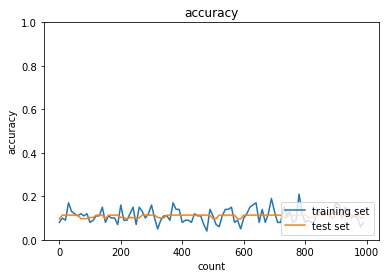

In [4]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Momentumの検討

```
Momentum　bace model (正答率 0.1028)

検討1 (正答率 0.9088)
バッチ正規化　use_batchnorm = False -> use_batchnorm = True

検討2(正答率 0.9661)
use_batchnorm = True
activation='sigmoid' -> activation='relu'

検討3(正答率 0.9519)
use_batchnorm = True
activation='relu'
weight_init_std=0.01 -> weight_init_std='he'

検討4(正答率 0.9608)
use_batchnorm = True
activation='relu'
weight_init_std=0.01 -> weight_init_std='xavier'

検討5(正答率 0.961)
use_batchnorm = True
activation='relu'
weight_init_std='xavier'
learning_rate = 0.01 -> learning_rate = 0.05

検討6(正答率 0.9641)
use_batchnorm = True
activation='relu'
weight_init_std='xavier'
learning_rate = 0.01 -> learning_rate = 0.09
```

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.69
                : 10. 正答率(テスト) = 0.6473
Generation: 20. 正答率(トレーニング) = 0.85
                : 20. 正答率(テスト) = 0.8066
Generation: 30. 正答率(トレーニング) = 0.86
                : 30. 正答率(テスト) = 0.8678
Generation: 40. 正答率(トレーニング) = 0.89
                : 40. 正答率(テスト) = 0.8879
Generation: 50. 正答率(トレーニング) = 0.86
                : 50. 正答率(テスト) = 0.9078
Generation: 60. 正答率(トレーニング) = 0.93
                : 60. 正答率(テスト) = 0.9129
Generation: 70. 正答率(トレーニング) = 0.88
                : 70. 正答率(テスト) = 0.9083
Generation: 80. 正答率(トレーニング) = 0.89
                : 80. 正答率(テスト) = 0.9179
Generation: 90. 正答率(トレーニング) = 0.84
                : 90. 正答率(テスト) = 0.9214
Generation: 100. 正答率(トレーニング) = 0.95
                : 100. 正答率(テスト) = 0.9296
Generation: 110. 正答率(トレーニング) = 0.95
                : 110. 正答率(テスト) = 0.9242
Generation: 120. 正答率(トレーニング) = 0.93
                : 120. 正答率(テスト) = 0.9284
Generation: 130. 正答率(トレーニング) = 0.95
                : 130. 正答率(テスト) = 0.9319
Generat

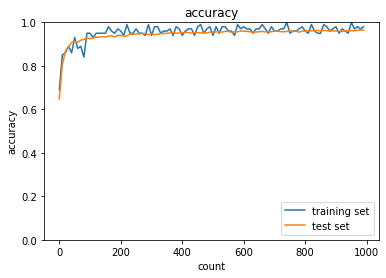

In [24]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = True
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='xavier',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.09
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## MomentumをもとにAdaGradを作成
θ = 1e-4 とする

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.1
                : 10. 正答率(テスト) = 0.1009
Generation: 20. 正答率(トレーニング) = 0.12
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.19
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.11
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.09
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.11
                : 60. 正答率(テスト) = 0.1028
Generation: 70. 正答率(トレーニング) = 0.12
                : 70. 正答率(テスト) = 0.1028
Generation: 80. 正答率(トレーニング) = 0.04
                : 80. 正答率(テスト) = 0.101
Generation: 90. 正答率(トレーニング) = 0.05
                : 90. 正答率(テスト) = 0.101
Generation: 100. 正答率(トレーニング) = 0.08
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.16
                : 110. 正答率(テスト) = 0.101
Generation: 120. 正答率(トレーニング) = 0.1
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.1
                : 130. 正答率(テスト) = 0.1135
Generation: 1

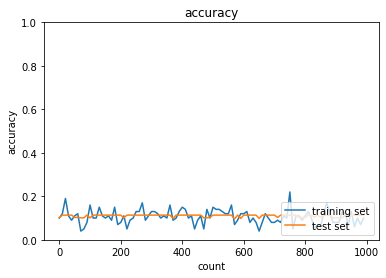

In [5]:
# AdaGrad
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        h[key] = momentum * h[key] - learning_rate * grad[key]
        network.params[key] += h[key]

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## AdaGradの検討

```
AdaGrad bace model (正答率 0.1135)

検討1 (正答率 0.9083)
バッチ正規化 use_batchnorm = False -> use_batchnorm = True

検討2(正答率 0.9599)
use_batchnorm = True
activation='sigmoid' -> activation='relu'

検討3(正答率 0.9513)
use_batchnorm = True
activation='relu'
weight_init_std=0.01 -> weight_init_std='he'

検討4(正答率 0.9547)
use_batchnorm = True
activation='relu'
weight_init_std=0.01 -> weight_init_std='xavier'

検討5(正答率 0.9638)
use_batchnorm = True
activation='relu'
weight_init_std='xavier'
learning_rate = 0.01 -> learning_rate = 0.05

検討6(正答率 0.9616)
use_batchnorm = True
activation='relu'
weight_init_std='xavier'
learning_rate = 0.01 -> learning_rate = 0.09
```

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.71
                : 10. 正答率(テスト) = 0.686
Generation: 20. 正答率(トレーニング) = 0.81
                : 20. 正答率(テスト) = 0.8068
Generation: 30. 正答率(トレーニング) = 0.88
                : 30. 正答率(テスト) = 0.8718
Generation: 40. 正答率(トレーニング) = 0.81
                : 40. 正答率(テスト) = 0.8889
Generation: 50. 正答率(トレーニング) = 0.9
                : 50. 正答率(テスト) = 0.8959
Generation: 60. 正答率(トレーニング) = 0.91
                : 60. 正答率(テスト) = 0.902
Generation: 70. 正答率(トレーニング) = 0.94
                : 70. 正答率(テスト) = 0.9172
Generation: 80. 正答率(トレーニング) = 0.95
                : 80. 正答率(テスト) = 0.9144
Generation: 90. 正答率(トレーニング) = 0.94
                : 90. 正答率(テスト) = 0.9246
Generation: 100. 正答率(トレーニング) = 0.95
                : 100. 正答率(テスト) = 0.9261
Generation: 110. 正答率(トレーニング) = 0.96
                : 110. 正答率(テスト) = 0.9285
Generation: 120. 正答率(トレーニング) = 0.91
                : 120. 正答率(テスト) = 0.9273
Generation: 130. 正答率(トレーニング) = 0.92
                : 130. 正答率(テスト) = 0.9284
Generation

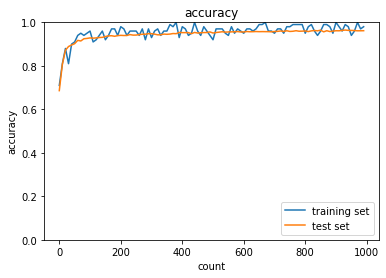

In [30]:
# AdaGrad
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = True
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='xavier',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.09

# AdaGradでは不必要
# =============================

momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        h[key] = momentum * h[key] - learning_rate * grad[key]
        network.params[key] += h[key]

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RMSprop

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.1
                : 20. 正答率(テスト) = 0.1138
Generation: 30. 正答率(トレーニング) = 0.25
                : 30. 正答率(テスト) = 0.2366
Generation: 40. 正答率(トレーニング) = 0.21
                : 40. 正答率(テスト) = 0.2236
Generation: 50. 正答率(トレーニング) = 0.32
                : 50. 正答率(テスト) = 0.2477
Generation: 60. 正答率(トレーニング) = 0.33
                : 60. 正答率(テスト) = 0.3423
Generation: 70. 正答率(トレーニング) = 0.33
                : 70. 正答率(テスト) = 0.3165
Generation: 80. 正答率(トレーニング) = 0.34
                : 80. 正答率(テスト) = 0.3849
Generation: 90. 正答率(トレーニング) = 0.49
                : 90. 正答率(テスト) = 0.4659
Generation: 100. 正答率(トレーニング) = 0.47
                : 100. 正答率(テスト) = 0.483
Generation: 110. 正答率(トレーニング) = 0.65
                : 110. 正答率(テスト) = 0.5581
Generation: 120. 正答率(トレーニング) = 0.66
                : 120. 正答率(テスト) = 0.6866
Generation: 130. 正答率(トレーニング) = 0.82
                : 130. 正答率(テスト) = 0.7026
Generatio

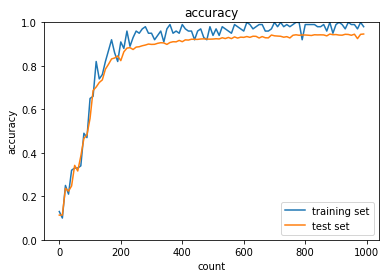

In [6]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RMSpropの検討

```
RMSprop bace model (正答率 0.9464)

検討1 (正答率 0.9066)
バッチ正規化 use_batchnorm = False -> use_batchnorm = True

検討2(正答率 0.9652)
use_batchnorm = True
activation='sigmoid' -> activation='relu'

検討3(正答率 0.9595)
use_batchnorm = True
activation='relu'
weight_init_std=0.01 -> weight_init_std='he'

検討4(正答率 0.9624)
use_batchnorm = True
activation='relu'
weight_init_std=0.01 -> weight_init_std='xavier'

検討5(正答率 0.9573)
use_batchnorm = True
activation='relu'
weight_init_std='xavier'
learning_rate = 0.01 -> learning_rate = 0.05

検討6(正答率 0.9505)
use_batchnorm = True
activation='relu'
weight_init_std='xavier'
learning_rate = 0.01 -> learning_rate = 0.09
```

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.74
                : 10. 正答率(テスト) = 0.63
Generation: 20. 正答率(トレーニング) = 0.84
                : 20. 正答率(テスト) = 0.7708
Generation: 30. 正答率(トレーニング) = 0.96
                : 30. 正答率(テスト) = 0.8685
Generation: 40. 正答率(トレーニング) = 0.99
                : 40. 正答率(テスト) = 0.8744
Generation: 50. 正答率(トレーニング) = 0.93
                : 50. 正答率(テスト) = 0.8669
Generation: 60. 正答率(トレーニング) = 0.97
                : 60. 正答率(テスト) = 0.8568
Generation: 70. 正答率(トレーニング) = 0.97
                : 70. 正答率(テスト) = 0.9012
Generation: 80. 正答率(トレーニング) = 0.98
                : 80. 正答率(テスト) = 0.9099
Generation: 90. 正答率(トレーニング) = 0.98
                : 90. 正答率(テスト) = 0.9177
Generation: 100. 正答率(トレーニング) = 0.99
                : 100. 正答率(テスト) = 0.9173
Generation: 110. 正答率(トレーニング) = 0.99
                : 110. 正答率(テスト) = 0.916
Generation: 120. 正答率(トレーニング) = 0.96
                : 120. 正答率(テスト) = 0.9157
Generation: 130. 正答率(トレーニング) = 1.0
                : 130. 正答率(テスト) = 0.9261
Generation:

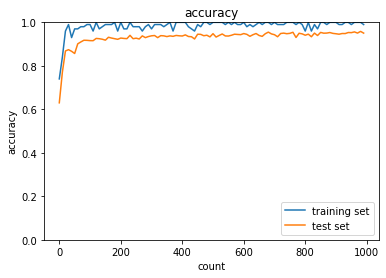

In [41]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = True
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='xavier',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.09
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Adam

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.1
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.1
                : 30. 正答率(テスト) = 0.1714
Generation: 40. 正答率(トレーニング) = 0.19
                : 40. 正答率(テスト) = 0.212
Generation: 50. 正答率(トレーニング) = 0.21
                : 50. 正答率(テスト) = 0.2079
Generation: 60. 正答率(トレーニング) = 0.23
                : 60. 正答率(テスト) = 0.2443
Generation: 70. 正答率(トレーニング) = 0.33
                : 70. 正答率(テスト) = 0.3058
Generation: 80. 正答率(トレーニング) = 0.33
                : 80. 正答率(テスト) = 0.3085
Generation: 90. 正答率(トレーニング) = 0.34
                : 90. 正答率(テスト) = 0.3809
Generation: 100. 正答率(トレーニング) = 0.34
                : 100. 正答率(テスト) = 0.379
Generation: 110. 正答率(トレーニング) = 0.42
                : 110. 正答率(テスト) = 0.4206
Generation: 120. 正答率(トレーニング) = 0.5
                : 120. 正答率(テスト) = 0.4488
Generation: 130. 正答率(トレーニング) = 0.5
                : 130. 正答率(テスト) = 0.5027
Generation: 1

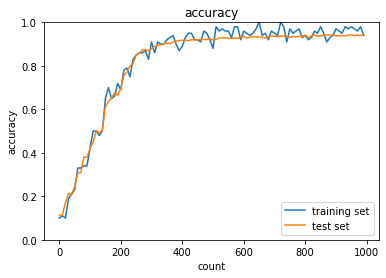

In [7]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Adamの検討

```
Adam bace model (正答率 0.9442)

検討1 (正答率 0.922)
バッチ正規化 use_batchnorm = False -> use_batchnorm = True

検討2(正答率 0.9641)
use_batchnorm = True
activation='sigmoid' -> activation='relu'

検討3(正答率 0.96)
use_batchnorm = True
activation='relu'
weight_init_std=0.01 -> weight_init_std='he'

検討4(正答率 0.962)
use_batchnorm = True
activation='relu'
weight_init_std=0.01 -> weight_init_std='xavier'

検討5(正答率 0.9562)
use_batchnorm = True
activation='relu'
weight_init_std='xavier'
learning_rate = 0.01 -> learning_rate = 0.05

検討6(正答率 0.9583)
use_batchnorm = True
activation='relu'
weight_init_std='xavier'
learning_rate = 0.01 -> learning_rate = 0.09
```

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.6
                : 10. 正答率(テスト) = 0.6535
Generation: 20. 正答率(トレーニング) = 0.83
                : 20. 正答率(テスト) = 0.8089
Generation: 30. 正答率(トレーニング) = 0.9
                : 30. 正答率(テスト) = 0.8519
Generation: 40. 正答率(トレーニング) = 0.88
                : 40. 正答率(テスト) = 0.8874
Generation: 50. 正答率(トレーニング) = 0.89
                : 50. 正答率(テスト) = 0.8929
Generation: 60. 正答率(トレーニング) = 0.95
                : 60. 正答率(テスト) = 0.898
Generation: 70. 正答率(トレーニング) = 0.87
                : 70. 正答率(テスト) = 0.8983
Generation: 80. 正答率(トレーニング) = 0.94
                : 80. 正答率(テスト) = 0.9104
Generation: 90. 正答率(トレーニング) = 0.95
                : 90. 正答率(テスト) = 0.9131
Generation: 100. 正答率(トレーニング) = 0.92
                : 100. 正答率(テスト) = 0.9156
Generation: 110. 正答率(トレーニング) = 0.85
                : 110. 正答率(テスト) = 0.9173
Generation: 120. 正答率(トレーニング) = 0.88
                : 120. 正答率(テスト) = 0.9243
Generation: 130. 正答率(トレーニング) = 0.96
                : 130. 正答率(テスト) = 0.9181
Generation

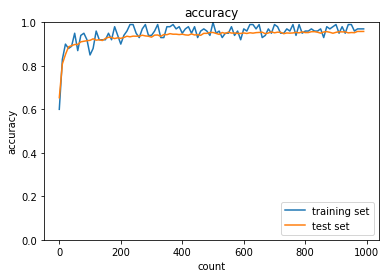

In [42]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = True
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='xavier',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.09
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()